In [ ]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers.core import Dense,Activation,Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#*************************************************************
# Cargamos el dataset 
#(x_train,y_train),(x_test,y_test) = mnist.load_data()
IDS = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(IDS.data,IDS.target, test_size = 0.15, random_state = 45)
#**************************************************************
# Covertimos a float, por defecto el tipo de datos uint8
x_Train = x_train.astype('float32')
y_Train = y_train.astype('float32')

# Normalizamos el conjunto de datos
scaler = StandardScaler()
x_Train = scaler.fit_transform(x_train)
x_Test = scaler.fit_transform(x_test)
#Los caracteres manuscritos vienen representados como 
#matrices de 28x28. Aquí se cambian a arreglos de 784 pixeles
#x_Train = x_Train.reshape(60000, 784)
#x_Test = x_test.reshape(10000, 784)
# Como utilizamos one-hot encoding, se convierten las etiquetas
# en un vector de 10 componentes
y_Train = to_categorical(y_train)
y_Test = to_categorical(y_test)
#**************************************************************
# Definimos el modelo que vamos a usar
model= Sequential()
model.add(Dense(512, activation='relu', input_shape=(4,)))
#model.add(Dense(196, activation='relu'))
model.add(Dense(3, activation='softmax'))
#model.add(Dropout(0.3))
#*********************************************************************
# Con la red definida en la sección anterior ahora podemos entrenarla
model.compile(loss="categorical_crossentropy",optimizer="sgd", metrics = ['accuracy'])
model.fit(x_Train, y_Train, batch_size=100, epochs=30)
#********************************************************************
# Ahora hacemos un test del modelo
test_loss, test_acc = model.evaluate(x_Test, y_Test)
test_acc

In [ ]:
predictions = model.predict(x_test)



In [ ]:
np.argmax(predictions[1])


In [ ]:
import keras
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers.core import Dense,Activation,Dropout
#*********************************************************************
# Cargamos el dataset 
(x_train,y_train),(x_test,y_test) = mnist.load_data()
#**************************************************************
# Covertimos a float, por defecto el tipo de datos uint8
x_Train = x_train.astype('float32')
y_Train = y_train.astype('float32')
# Normalizamos el conjunto de datos
x_Train /= 255
x_Test /= 255
#Los caracteres manuscritos vienen representados como 
#matrices de 28x28. Aquí se cambian a arreglos de 784 pixeles
x_Train = x_Train.reshape(60000, 784)
x_Test = x_test.reshape(10000, 784)
# Como utilizamos one-hot encoding, se convierten las etiquetas
# en un vector de 10 componentes
y_Train = to_categorical(y_train)
y_Test = to_categorical(y_test)
#**************************************************************
# Definimos el modelo que vamos a usar
model= Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
#model.add(Dense(196, activation='relu'))
model.add(Dense(10, activation='softmax'))
#model.add(Dropout(0.3))
#*********************************************************************
# Con la red definida en la sección anterior ahora podemos entrenarla
model.compile(loss="categorical_crossentropy",optimizer="sgd", metrics = ['accuracy'])
model.fit(x_Train, y_Train, batch_size=100, epochs=30)
#********************************************************************
# Ahora hacemos un test del modelo
test_loss, test_acc = model.evaluate(x_Test, y_Test)
test_acc

In [8]:
import keras
from keras import layers
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers.core import Dense,Activation,Dropout
#*********************************************************************
# Cargamos el dataset 
(x_train,y_train),(x_test,y_test) = mnist.load_data()
#**************************************************************
#Los caracteres manuscritos vienen representados como 
#matrices de 28x28. Aquí se cambian a arreglos de 784 pixeles
x_Train = x_train.reshape(60000,28,28,1)
x_Train = x_Train.astype('float32') / 255
x_Test = x_test.reshape(10000, 28, 28, 1)
x_Test = x_Test.astype('float32') / 255
# Como utilizamos one-hot encoding, se convierten las etiquetas
# en un vector de 10 componentes
y_Train = to_categorical(y_train)
y_Test = to_categorical(y_test)
#**************************************************************
# Definimos el modelo que vamos a usar
model= Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu',input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))
#*********************************************************************
# Con la red definida en la sección anterior ahora podemos entrenarla
model.compile(loss="categorical_crossentropy",optimizer="sgd", metrics = ['accuracy'])
modelinfo=model.fit(x_Train, y_Train, batch_size=100, epochs=5)
#********************************************************************
# Ahora hacemos un test del modelo
test_loss, test_acc = model.evaluate(x_Test, y_Test)
test_acc
#********************************************************************


Epoch 1/5
600/600 [==============================] - 27s 44ms/step - loss: 1.0646 - accuracy: 0.6825
Epoch 2/5
600/600 [==============================] - 26s 44ms/step - loss: 0.3176 - accuracy: 0.9065
Epoch 3/5
600/600 [==============================] - 26s 44ms/step - loss: 0.2240 - accuracy: 0.9340
Epoch 4/5
600/600 [==============================] - 26s 44ms/step - loss: 0.1815 - accuracy: 0.9461
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.1036 - accuracy: 0.9713


KeyError: 'val_loss'

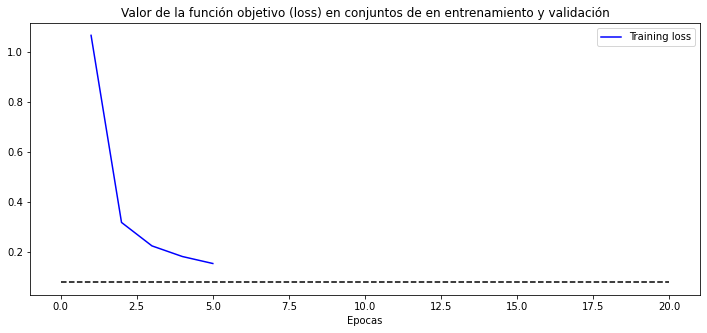

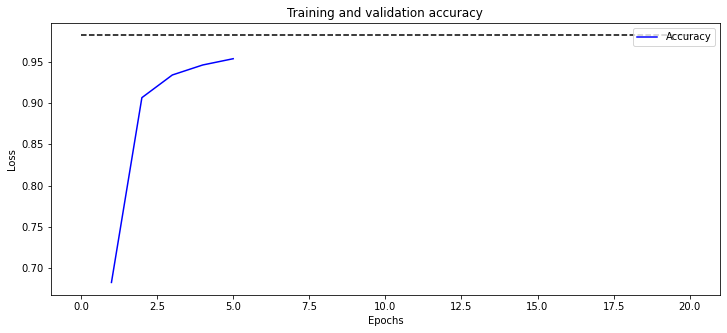

In [17]:
import matplotlib.pyplot as plt
history_dict = modelinfo.history
dictkeys=list(history_dict.keys())
loss_values = modelinfo.history['loss']
#val_loss_values = modelinfo.history['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.figure(figsize=(12,5))
plt.plot(epochs, loss_values, 'b', label='Training loss')
#plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Valor de la función objetivo (loss) en conjuntos de en entrenamiento y validación')
plt.xlabel('Epocas')
plt.ylabel('')
plt.hlines(y=.078, xmin=0, xmax=20, colors='k', linestyles='dashed')
plt.legend()
plt.show()

acc_values = history_dict['accuracy']
#val_acc_values = history_dict['val_accuracy']
plt.figure(figsize=(12,5))
plt.plot(epochs, acc_values, 'b', label='Accuracy')
#plt.plot(epochs, val_acc_values, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.hlines(y=.982, xmin=0, xmax=20, colors='k', linestyles='dashed')
plt.legend()
plt.show()

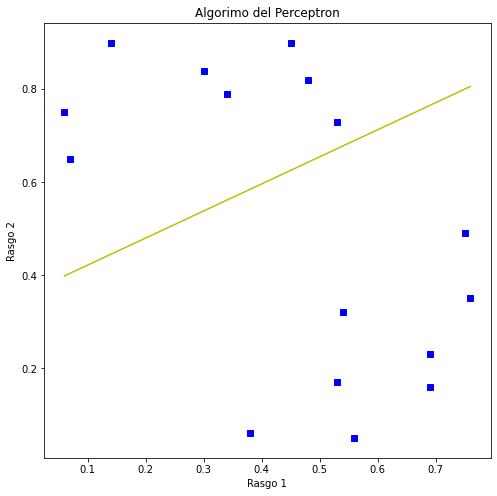

Acc sobre el conjunto de prueva: 1.0
Acc sobre el conjunto de prueva: 1.0


In [157]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
#********************************************************************************
def perceptron(X,y,lrate,epocas):
    #Se extrae el número de casos y el número de rasgos
    m, n = X.shape
    # Se inicializan los pesos a cero y se agrega el bias
    W = np.zeros((n+1,1))
    miss_list=[]
    # Esto lo repetimos el número de epocas
    for epoca in range(epocas):
        # Variable donde guardamos el número de errores
        miss_n=0
        for index, x in enumerate(X):
            #inserta el bias
            x = np.insert(x, 0, 1).reshape(-1,1)
            # Intenta clasificar el caso x con los parámetros w
            y_hat = step_func(np.dot(x.T, W))
            #si hay error en la clasificación ajusta los pesos W
            if (y_hat - y[index]) != 0:
                #aplica la regla de acctualización lrate*(Actual-predicho)*x
                W += lrate*((y[index] - y_hat)*x)
                miss_n += 1
    miss_list.append(miss_n)  
    return W,miss_list
#***********************************************************************************
#Función Step de Heaviside
def step_func(z):
    return 1.0 if(z>=0) else 0.0
#************************************** 
def plot_decision_boundary(X, W):
    # en X estan todos los casos
    # W contiene todos los pesos
    # La superficie de decisión es una linea y=mx+c
    # De forma que mx+c = W0.X0 + W1.X1 + W2.X2
    # Vamos a resolver la ecuación
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -W[1]/W[2]
    c = -W[0]/W[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(8,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0],"bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1],"b^")
    plt.xlabel("Rasgo 1")
    plt.ylabel("Rasgo 2")
    plt.title('Algorimo del Perceptron')
    plt.plot(x1, x2, 'y-')
    plt.show()
#***************************************************************************
def Perceptron_predict(X,W):
    n=len(X)
    target=[]
    for index, x in enumerate(X):
        x = np.insert(x, 0, 1).reshape(-1,1)
        target.append(step_func(np.dot(x.T, W)))
    return target
#*******************************************************************************
# Puntos que forman el conjunto de entrenamiento
X=np.array([[0.3,0.84],[0.45,0.9],[0.48,0.82],[0.53,0.73],
           [0.54,0.32],[0.76,0.35],[0.75,0.49],[0.69,0.23]])
Y =[1,1,1,1,0,0,0,0]
# Puntos que sirven de conjunto de prueba. 
X_test=np.array([[0.07,0.65],[0.06,0.75],[0.14,0.9],[0.34,0.79],
           [0.38,0.06],[0.56,0.05],[0.69,0.16],[0.53,0.17]])
Y_test =[1,1,1,1,0,0,0,0]
W, miss_l = perceptron(X, Y, 0.6, 10)
X_C=np.concatenate((X,X_test), axis=0)
plot_decision_boundary(X_C, W)
pred_test = Perceptron_predict(X_test,W)
pred_train = Perceptron_predict(X,W)
acc_train= accuracy_score(Y_test,pred_train)
acc_test= accuracy_score(Y_test,pred_test)
print("Acc sobre el conjunto de prueva:",acc_train)
print("Acc sobre el conjunto de prueva:",acc_test)

In [ ]:
#Ejemplo de uso de XGBoost comparado con Regesión Lineal
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#****************************************************************************
iris = datasets.load_iris()
#******************************************************************
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size = 0.25, random_state = 0)
#******************************************************************
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
#***********************************************************************************************
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,seed=123,label_encoder=False)
clf_xgb.fit(X_train, y_train)
preds_xgb = clf_xgb.predict(X_test)
clf_lr = LR().fit(X_train, y_train)
accuracy_xgb = float(np.sum(preds_xgb == y_test))/y_test.shape[0]
print('Accuracy de XGBoost: ', accuracy_xgb)
accuracy_lr = clf_lr.score(X_test, y_test)
print('Accuracy de Regresion Lineal: ', accuracy_lr)